# Generating random data for leaning

In [1]:
import numpy as np
import random

data_train = [random.randint(1, 100) for _ in range(10000)]

len(data_train)

10000

In [2]:
data_train = np.array(data_train)

data_train.shape

(10000,)

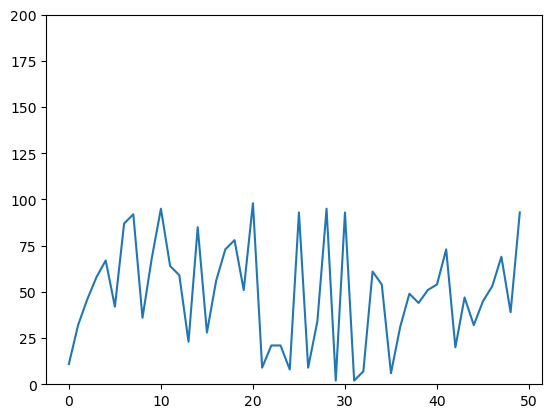

In [3]:
import matplotlib.pyplot as plt

plt.plot(data_train[:50])
plt.ylim([0, 200])
plt.show()

# Generating random data for Testing

In [4]:
data_test_normal = [random.randint(1, 100) for _ in range(100)]
data_test_anomaly = [random.randint(100, 200) for _ in range(100)]

data_test_normal = np.array(data_test_normal)
data_test_anomaly = np.array(data_test_anomaly)

data_test = np.concatenate((data_test_normal, data_test_anomaly))

data_test.shape

(200,)

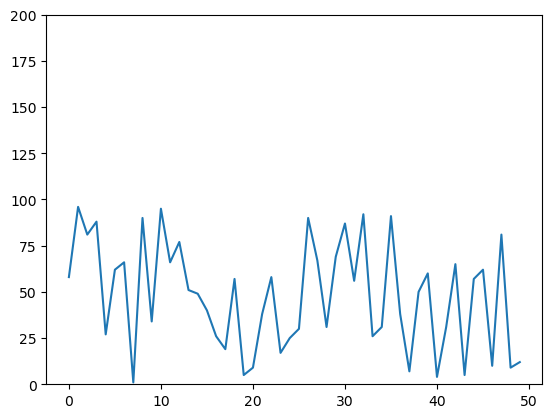

In [5]:
plt.plot(data_test[:50])
plt.ylim([0, 200])
plt.show()

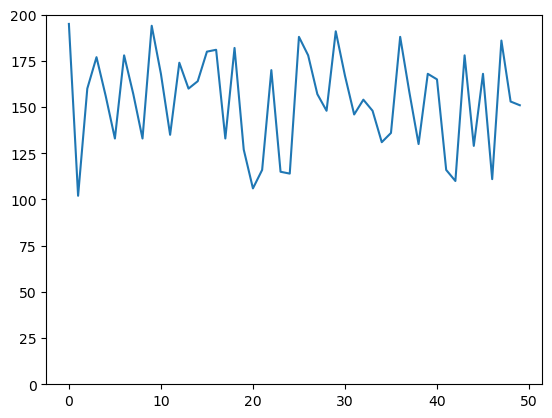

In [6]:
plt.plot(data_test[-50:])
plt.ylim([0, 200])
plt.show()

# Data Preprocessing

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_train = scaler.fit_transform(data_train.reshape(-1, 1))
data_test = scaler.transform(data_test.reshape(-1, 1))

data_train.shape, data_test.shape

((10000, 1), (200, 1))

In [19]:
time_step = 1

time_step

1

In [20]:
data_train = data_train.reshape(-1, time_step, 1)
data_test = data_test.reshape(-1, time_step, 1)

data_train.shape, data_test.shape

((10000, 1, 1), (200, 1, 1))

# Developing model

In [21]:
from keras.models import Sequential
from keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense

model = Sequential()
model.add(LSTM(units=50, activation='tanh', input_shape=(time_step, 1)))
model.add(RepeatVector(n=time_step))
model.add(LSTM(units=50, activation='tanh', return_sequences=True))
model.add(TimeDistributed(Dense(units=1)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50)                10400     
                                                                 
 repeat_vector_1 (RepeatVect  (None, 1, 50)            0         
 or)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 1, 50)             20200     
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 1)             51        
 tributed)                                                       
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss='mae', optimizer='adam')

history = model.fit(x=data_train, y=data_train, epochs=50, validation_split=0.2)

Epoch 1/50
250/250 [==============================] - 3s 4ms/step - loss: 0.2148 - val_loss: 0.0091
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0044 - val_loss: 0.0010
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0018
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0017
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 9.9747e-04
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0014
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0072
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 8.2394e-04
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0020 - val_loss

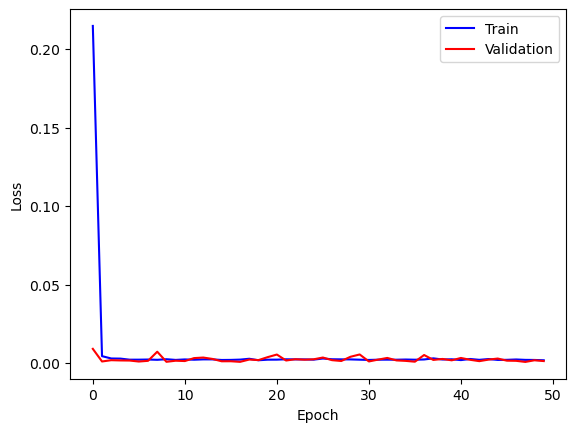

In [23]:
plt.plot(history.history['loss'], color='blue', label='Train')
plt.plot(history.history['val_loss'], color='red', label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Get threshold

In [24]:
yhat_train = model.predict(data_train)

mae_train = np.mean(np.abs(yhat_train - data_train), axis=1)

mae_train.shape

313/313 [==============================] - 1s 868us/step


(10000, 1)

In [25]:
threshold = max(mae_train)

threshold

array([0.0038698])

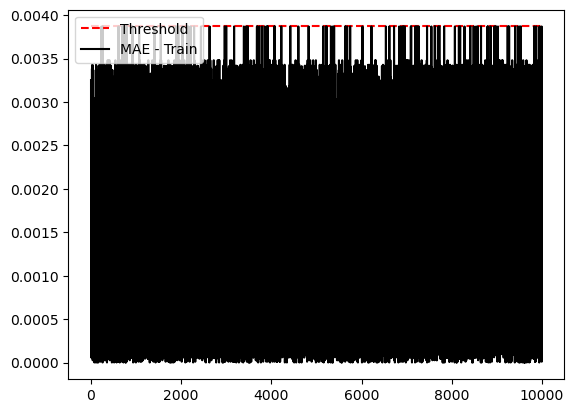

In [26]:
plt.hlines(y=threshold, xmin=0, xmax=len(mae_train), color='red', linestyles='--', label='Threshold')
plt.plot(mae_train, color='black', label='MAE - Train')
plt.legend()
plt.show()

# Visualize the result

In [27]:
yhat_test = model.predict(data_test)

mae_test = np.mean(np.abs(yhat_test - data_test), axis=1)

mae_test.shape

7/7 [==============================] - 0s 1ms/step


(200, 1)

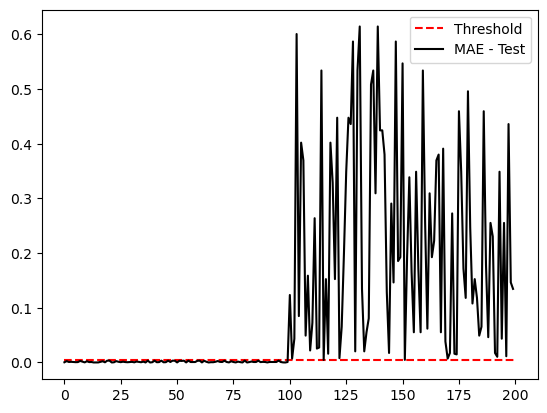

In [30]:
plt.hlines(y=threshold, xmin=0, xmax=len(mae_test), color='red', linestyles='--', label='Threshold')
plt.plot(mae_test, color='black', label='MAE - Test')
#plt.xticks([0, 5, 9, 14, 19], ['1', '5', '10', '15', '20'])
plt.legend()
plt.show()